# Logistic Classifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
from sklearn.model_selection import train_test_split

In [3]:
#Extracting x and y data
with h5py.File('mnist_testdata.hdf5', 'r') as hf:
    xdata = hf['xdata'][:]
    ydata = hf['ydata'][:]

In [4]:
xdata.shape

(10000, 784)

In [5]:
ydata

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
ydata.shape

(10000, 10)

In [7]:
y_label = np.argmax(ydata,axis=1)
y_label = np.where(y_label == 2,1,0) #1 if its 2, 0 otherwise
y_label.shape

(10000,)

In [8]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [9]:
def init(xdata):
    n_samples, n_features = xdata.shape
    init_weights = np.random.randn(n_features)
    init_bias = np.random.randn()
    return init_weights,init_bias

In [10]:
def feed_forward(X,weights,bias):
    a = np.dot(X,weights) + bias
    yhat = sigmoid(a)
    return yhat

In [11]:
def compute_loss(y_label,y_pred):
    epsilon = 1e-9   #to avoid log0 calculations
    y1 = y_label*np.log(y_pred + epsilon)
    y2 = (1-y_label)*np.log(1-y_pred + epsilon)
    return -np.mean(y1+y2)

In [12]:
def compute_accuracy(y_label,y_pred):
    y_pred = np.round(y_pred)
    return np.mean(y_label == y_pred)

In [13]:
def fit(x_train,y_train,x_test,y_test,lr,l2,epochs):
    weights,bias = init(x_train)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    for _ in range(epochs):
        train_pred = np.zeros(x_train.shape[0])  # Initialize as NumPy array
        test_pred = np.zeros(x_test.shape[0])
        for i in range(x_train.shape[0]):
            yhat = feed_forward(x_train[i],weights,bias)
            dw = (x_train[i] * yhat * (1 - yhat) * (y_train[i] - yhat) + 2 * l2 * weights) #adding l2 regularization parameter
            db = yhat * (1 - yhat) * (y_train[i] - yhat)
            weights += lr * dw
            bias += lr * db
        for j in range(x_train.shape[0]):
            train_pred[j] = feed_forward(x_train[j],weights,bias)
        loss1 = compute_loss(y_train,train_pred)
        accuracy1 = compute_accuracy(y_train,train_pred)
        train_loss.append(loss1)
        train_accuracy.append(accuracy1)
        for i in range(x_test.shape[0]):
            test_pred[i] = feed_forward(x_test[i],weights,bias)
        loss2 = compute_loss(y_test,test_pred)
        accuracy2 = compute_accuracy(y_test,test_pred)
        test_loss.append(loss2)
        test_accuracy.append(accuracy2)
    return weights,bias,train_loss,test_loss,train_accuracy,test_accuracy
        

In [44]:
x_train, x_test, y_train, y_test = train_test_split(xdata, y_label, test_size=0.25, random_state=15)
x_train.shape

(7500, 784)

In [52]:
#tested with 0.01 0.0001 and 0.00001 and got the following results
# 0.01 too high -> model was diverging
# 0.0001 optimal
# 0.00001 too slow -> model did not converge until 200 epochs

weights,bias,train_loss,test_loss,train_accuracy,test_accuracy = fit(x_train,y_train,x_test,y_test,0.0001,0.00001,40)

In [66]:
outFile = 'HW4_aditi_model_weights.hdf5'

with h5py.File(outFile, 'w') as hf:
    hf.create_dataset('w', data = np.asarray(weights))
    hf.create_dataset('b', data = np.asarray(bias))

<function matplotlib.pyplot.show(close=None, block=None)>

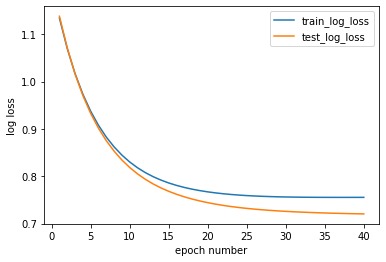

In [53]:
#plotting the training and testing loss
epoch = [i for i in range(1,41,1)]
plt.plot(epoch,train_loss , label='train_log_loss')
plt.plot(epoch,test_loss, label='test_log_loss')
plt.xlabel("epoch number")
plt.ylabel("log loss")
plt.legend()
plt.show

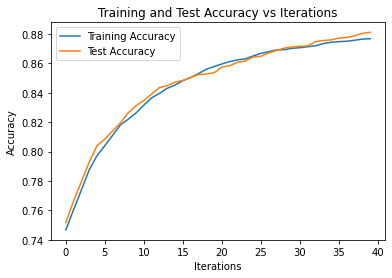

In [54]:
#plotting training and testing accuracy over iterations

plt.plot(range(len(train_accuracy)), train_accuracy, label='Training Accuracy')
plt.plot(range(len(test_accuracy)), test_accuracy, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Iterations')
plt.legend()
plt.show()

In [55]:
def predict(X,weights,bias,y_true):
    preds = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        y = feed_forward(X[i],weights,bias)
        preds[i]= y
    return compute_accuracy(y_true,preds)
    

In [56]:
training_accuracy = predict(x_train,weights,bias,y_train)
print(training_accuracy)

0.8768


In [57]:
testing_accuracy = predict(x_test,weights,bias,y_test)
print(testing_accuracy)

0.8812


# L1 regularization

In [59]:
def fit_l1(x_train,y_train,x_test,y_test,lr,l1,epochs):
    weights,bias = init(x_train)
    train_loss_l1 = []
    test_loss_l1 = []
    train_accuracy_l1 = []
    test_accuracy_l1 = []
    for _ in range(epochs):
        train_pred_l1 = np.zeros(x_train.shape[0])  # Initialize as NumPy array
        test_pred_l1 = np.zeros(x_test.shape[0])
        for i in range(x_train.shape[0]):
            yhat = feed_forward(x_train[i],weights,bias)
            dw = (x_train[i] * yhat * (1 - yhat) * (y_train[i] - yhat)) 
            db = yhat * (1 - yhat) * (y_train[i] - yhat)
            weights += lr * dw - lr * l1 * np.sign(weights) #adding l1 regularization parameter
            bias += lr * db
        for j in range(x_train.shape[0]):
            train_pred_l1[j] = feed_forward(x_train[j],weights,bias)
        loss1 = compute_loss(y_train,train_pred_l1)
        accuracy1 = compute_accuracy(y_train,train_pred_l1)
        train_loss_l1.append(loss1)
        train_accuracy_l1.append(accuracy1)
        for i in range(x_test.shape[0]):
            test_pred_l1[i] = feed_forward(x_test[i],weights,bias)
        loss2 = compute_loss(y_test,test_pred_l1)
        accuracy2 = compute_accuracy(y_test,test_pred_l1)
        test_loss_l1.append(loss2)
        test_accuracy_l1.append(accuracy2)
    return weights_l1,bias_l1,train_loss_l1,test_loss_l1,train_accuracy_l1,test_accuracy_l1

In [60]:
weights_l1,bias_l1,train_loss_l1,test_loss_l1,train_accuracy_l1,test_accuracy_l1 = fit(x_train,y_train,x_test,y_test,0.0001,0.00001,40)

<function matplotlib.pyplot.show(close=None, block=None)>

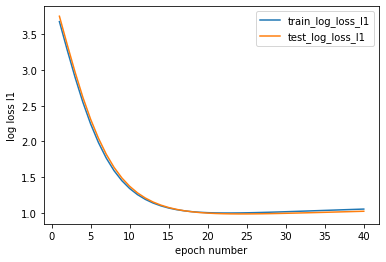

In [61]:
#plotting the training and testing loss
epoch = [i for i in range(1,41,1)]
plt.plot(epoch,train_loss_l1 , label='train_log_loss_l1')
plt.plot(epoch,test_loss_l1, label='test_log_loss_l1')
plt.xlabel("epoch number")
plt.ylabel("log loss l1")
plt.legend()
plt.show

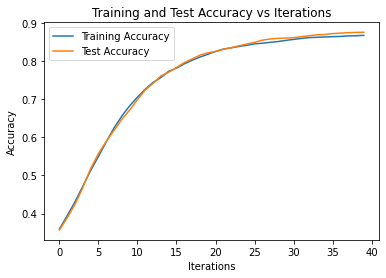

In [62]:
#plotting training and testing accuracy over iterations

plt.plot(range(len(train_accuracy_l1)), train_accuracy_l1, label='Training Accuracy')
plt.plot(range(len(test_accuracy_l1)), test_accuracy_l1, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Iterations')
plt.legend()
plt.show()

In [64]:
training_accuracy_l1 = predict(x_train,weights_l1,bias_l1,y_train)
print(training_accuracy_l1)

0.8670666666666667


In [65]:
testing_accuracy_l1 = predict(x_test,weights_l1,bias_l1,y_test)
print(testing_accuracy_l1)

0.8752


# Results
Without using regularization:
epochs: 40
Learning rate: 0.0001
training accuracy: 81.45%
testing accuracy:  83.08%



Using L2 regularization:
regularization parameter: 0.0001
epochs: 40
Learning rate: 0.0001
training accuracy: 85.52%
testing accuracy:  85.28%



regularization parameter: 0.00001
epochs: 40
Learning rate: 0.0001
training accuracy: 87.68%
testing accuracy:  88.12%



Using L1 regularization:
regularization parameter: 0.00001
epochs: 40
Learning rate: 0.0001
training accuracy: 86.70%
testing accuracy:  87.52%

After using regularization training and testing accuracy increased and overfitting decreased as we got a better test accuracy. There is not much difference between L1 and L2 regularizations in terms of accuracies though L2 performs slightly better.

Used the negative log likelihood to establish model convergence. Monitored the log loss over epochs to see if its converging or diverging. If the log loss is decreasing and constant then the model has converged